In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot') #Style sheet

In [2]:
# Load datasets
cash = pd.read_csv('https://raw.githubusercontent.com/kurtisjw/project-1-ironhack-payments-es/main/project_dataset/extract%20-%20cash%20request%20-%20data%20analyst.csv')
fees = pd.read_csv('https://raw.githubusercontent.com/kurtisjw/project-1-ironhack-payments-es/main/project_dataset/extract%20-%20fees%20-%20data%20analyst%20-%20.csv')

In [3]:
cash.head(5)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [4]:
fees.head(5)

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [5]:
# Convert 'created_at' data type to to datetime
cash['created_at'] = pd.to_datetime(cash['created_at'])

In [6]:
# Create month and cohorts columns
cash.sort_values(by='user_id', inplace=True)
cash['month'] = cash['created_at'].dt.to_period('M')
cash['cohorts'] = cash.groupby('user_id')['month'].transform('min')
cash[['cohorts', 'month', 'user_id']].head(10)

C:\Users\ivani\AppData\Local\Temp\ipykernel_14004\286522853.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash['month'] = cash['created_at'].dt.to_period('M')


,cohorts,month,user_id
538,2020-04,2020-04,34.0
91,2019-12,2020-02,35.0
345,2019-12,2020-01,35.0
5298,2019-12,2020-08,35.0
58,2019-12,2019-12,35.0
180,2019-12,2019-12,35.0
6842,2019-12,2020-09,35.0
670,2019-12,2020-03,35.0
1037,2019-11,2020-08,47.0
445,2019-11,2020-04,47.0


In [7]:
# Group cash by cohortes column and calculate the number of unique user IDs in each cohort month using the nunique function. Store result in cohort_user_counts
# Reset Index

cohort_user_counts = cash.groupby('cohorts')['user_id'].nunique().reset_index()
cohort_user_counts

,cohorts,user_id
0,2019-11,1
1,2019-12,204
2,2020-01,90
3,2020-02,84
4,2020-03,69
5,2020-04,212
6,2020-05,369
7,2020-06,1338
8,2020-07,1294
9,2020-08,656


In [8]:
# Calculate the count of unique users who made their first loan in each cohort month ('cohorts') and had subsequent loans in each regular month ('month').
cohort_month_user_counts = cash.groupby(['cohorts', 'month'])['user_id'].nunique().reset_index()
cohort_month_user_counts

# The 'cash' dataframe is grouped by two columns, 'cohortes' (cohort month) and 'month' (regular month). Within each group the nunique function counts the number of unique user IDs. This calculates how many unique users from each cohort month continued to engage with the platform in each regular month.

,cohorts,month,user_id
0,2019-11,2019-11,1
1,2019-11,2019-12,1
2,2019-11,2020-04,1
3,2019-11,2020-05,1
4,2019-11,2020-08,1
...,...,...,...
78,2020-09,2020-10,660
79,2020-09,2020-11,20
80,2020-10,2020-10,4694
81,2020-10,2020-11,15


In [9]:
# Group the cohort_month_user_counts DataFrame by the cohort month ('cohorts') column.
# Within each group, select the first row, representing the counts of unique users for the initial regular month of each cohort.
first_cohort_month_counts = cohort_month_user_counts.groupby('cohorts').first()
first_cohort_month_counts

,month,user_id
cohorts,,
2019-11,2019-11,1
2019-12,2019-12,204
2020-01,2020-01,90
2020-02,2020-02,84
2020-03,2020-03,69
2020-04,2020-04,212
2020-05,2020-05,369
2020-06,2020-06,1338
2020-07,2020-07,1294


In [10]:
# Create a pivot table and calculate customer retention rate
retention = cohort_month_user_counts.pivot(index='cohorts', columns='month', values='user_id').divide(first_cohort_month_counts['user_id'], axis=0) * 100
retention

month,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
cohorts,,,,,,,,,,,,,
2019-11,100.0,100.0,NaN,NaN,NaN,100.000000,100.000000,NaN,NaN,100.000000,100.000000,100.000000,NaN
2019-12,NaN,100.0,33.823529,21.568627,27.450980,25.980392,32.352941,28.921569,25.490196,30.882353,20.588235,28.921569,0.490196
2020-01,NaN,NaN,100.000000,21.111111,15.555556,30.000000,25.555556,26.666667,30.000000,23.333333,22.222222,25.555556,1.111111
2020-02,NaN,NaN,NaN,100.000000,52.380952,48.809524,48.809524,45.238095,42.857143,42.857143,29.761905,41.666667,NaN
2020-03,NaN,NaN,NaN,NaN,100.000000,50.724638,46.376812,59.420290,43.478261,40.579710,37.681159,39.130435,1.449275
2020-04,NaN,NaN,NaN,NaN,NaN,100.000000,49.056604,50.943396,39.622642,35.849057,31.132075,27.830189,NaN
2020-05,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,61.517615,53.658537,45.257453,34.688347,40.108401,0.813008
2020-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,52.092676,51.569507,40.358744,40.508221,0.298954
2020-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,49.922720,37.403400,39.489954,0.540958


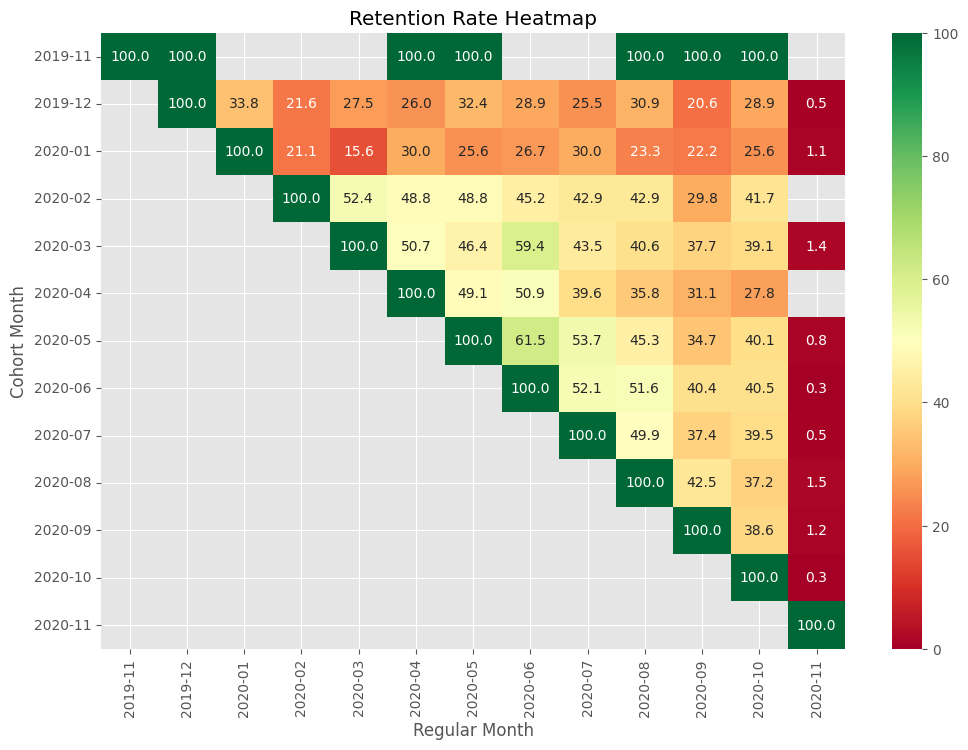

In [11]:
# Create heatmap visualisation to display the retention rates of our cohorts
plt.figure(figsize=(12,8))
sns.heatmap(retention, annot=True, fmt=".1f", cmap="RdYlGn", vmin=0, vmax=100)

# Add title and axis labels
plt.title('Retention Rate Heatmap')
plt.xlabel('Regular Month')
plt.ylabel('Cohort Month')

plt.show()

<Axes: title={'center': 'Income Per Cohort'}, xlabel='Cohort', ylabel='Total Amount'>

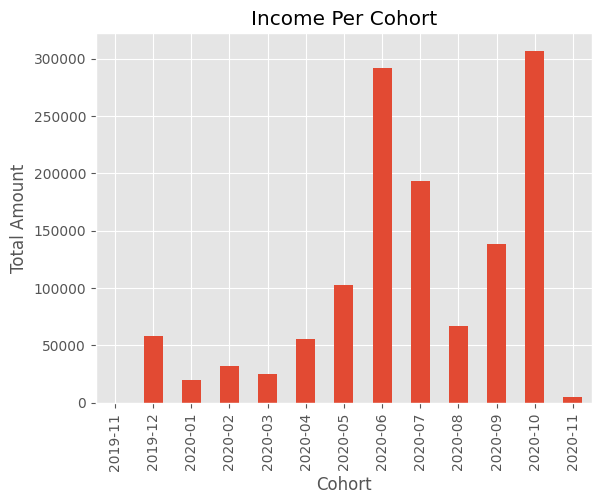

In [12]:
# Create barplot to display income generated per cohort
income_cohort = cash[cash['status'] == 'money_back'].groupby('cohorts')['amount'].sum()
income_cohort.plot(kind='bar', ylabel= 'Total Amount', xlabel='Cohort', title='Income Per Cohort')

In [13]:
cash.head(5)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,month,cohorts
538,1302,100.0,rejected,2020-04-20 15:50:21.187257+00:00,2020-04-22 12:03:34.439811+00,34.0,2020-04-22 12:03:34.434712+00,NaN,2020-04-27 15:50:21.18689+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-04,2020-04
91,758,90.0,rejected,2020-02-28 10:51:11.440880+00:00,2020-02-28 14:13:21.50435+00,35.0,2020-02-28 14:13:21.501335+00,NaN,2020-03-07 23:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-02,2019-12
345,510,90.0,rejected,2020-01-27 19:50:46.387431+00:00,2020-01-28 14:52:30.164273+00,35.0,2020-01-28 14:52:30.160427+00,NaN,2020-02-03 19:50:46.387008+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-01,2019-12
5298,12794,100.0,rejected,2020-08-17 13:19:41.318905+00:00,2020-08-17 15:04:14.916382+00,35.0,2020-08-17 15:04:14.912309+00,NaN,2020-09-07 22:00:00+00,NaN,NaN,instant,2020-08-24 13:19:41.267425+00,NaN,NaN,NaN,2020-08,2019-12
58,150,100.0,rejected,2019-12-13 20:27:38.106778+00:00,2019-12-18 15:20:41.722482+00,35.0,2019-12-18 15:20:41.715612+00,NaN,2019-12-20 20:27:38.106319+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12,2019-12


In [14]:
# Group by 'cohorts' and 'status' to get the count of each status value for each cohort
cohort_status_counts = cash.groupby(['cohorts', 'status'])['user_id'].count()

# Reset index to convert the result into a DataFrame
cohort_status_counts = cohort_status_counts.reset_index()

# Pivot the DataFrame to have 'first_loan_month' as index and 'status' values as columns
cohort_status_counts_pivot = cohort_status_counts.pivot(index='cohorts', columns='status', values='user_id')

# Fill missing values with 0
cohort_status_counts_pivot = cohort_status_counts_pivot.fillna(0)

# Display the resulting DataFrame
cohort_status_counts_pivot

status,active,canceled,direct_debit_rejected,direct_debit_sent,money_back,rejected,transaction_declined
cohorts,,,,,,,
2019-11,0.0,1.0,0.0,0.0,6.0,1.0,0.0
2019-12,0.0,0.0,39.0,2.0,611.0,240.0,1.0
2020-01,0.0,0.0,11.0,0.0,207.0,103.0,0.0
2020-02,1.0,0.0,8.0,0.0,336.0,77.0,1.0
2020-03,1.0,0.0,4.0,1.0,248.0,69.0,0.0
2020-04,0.0,0.0,34.0,1.0,593.0,212.0,0.0
2020-05,1.0,0.0,38.0,2.0,1096.0,312.0,0.0
2020-06,12.0,2.0,119.0,4.0,3197.0,1369.0,8.0
2020-07,14.0,2.0,132.0,3.0,2230.0,1349.0,5.0


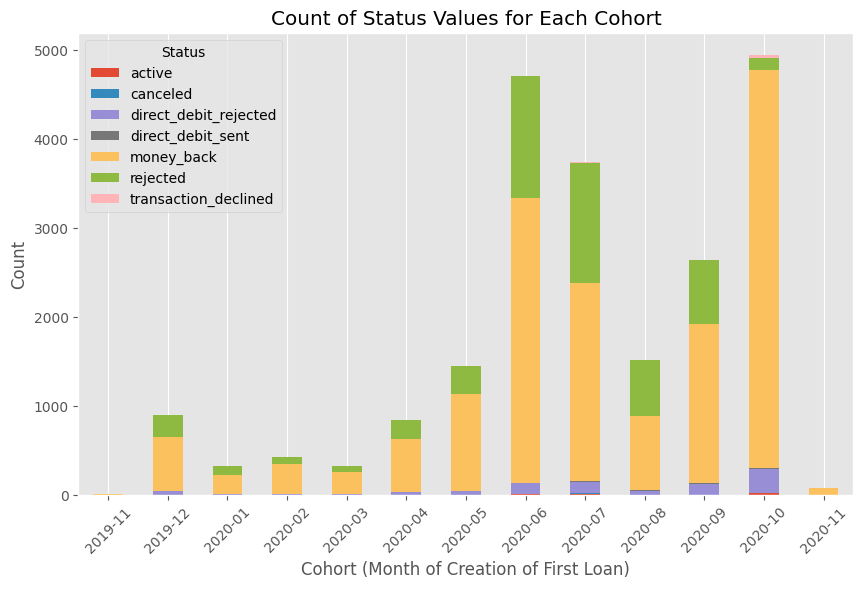

In [15]:
# Stacked Bar Chart
cohort_status_counts_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Count of Status Values for Each Cohort')
plt.xlabel('Cohort (Month of Creation of First Loan)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.grid(axis='y')
plt.show()

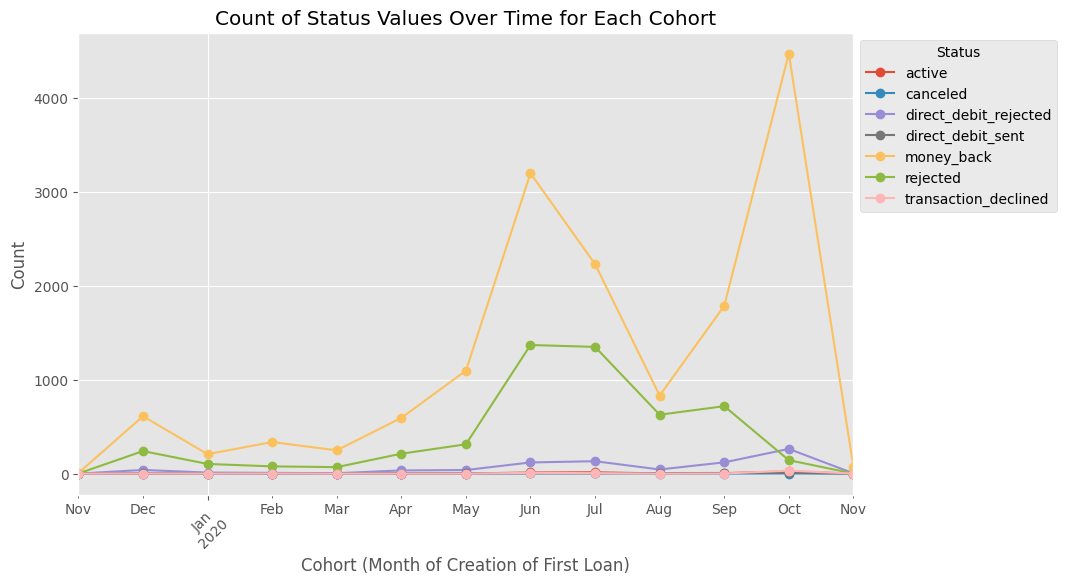

In [16]:
# Line Chart
cohort_status_counts_pivot.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Count of Status Values Over Time for Each Cohort')
plt.xlabel('Cohort (Month of Creation of First Loan)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

Text(0, 0.5, 'Cohorts')

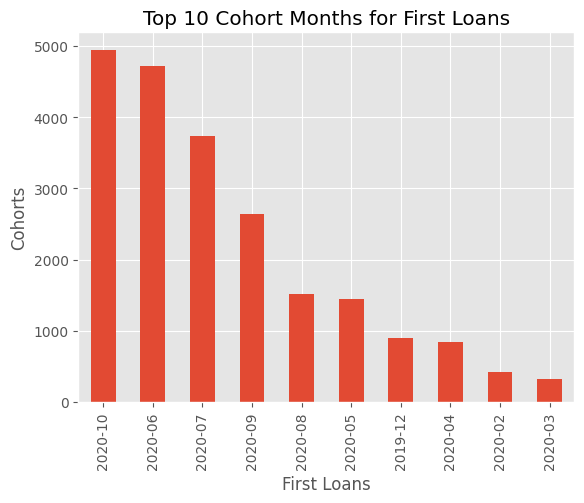

In [17]:
cash['cohorts'].value_counts() \
.head(10) \
.plot(kind = 'bar', title = 'Top 10 Cohort Months for First Loans')
plt.xlabel('First Loans')
plt.ylabel('Cohorts')

Text(0, 0.5, 'Frequency')

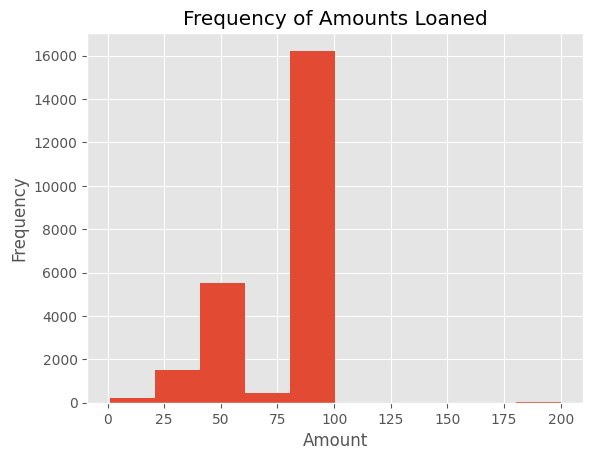

In [18]:
cash['amount'].plot(kind = 'hist', bins = 10)
plt.title('Frequency of Amounts Loaned')
plt.xlabel('Amount')
plt.ylabel('Frequency')

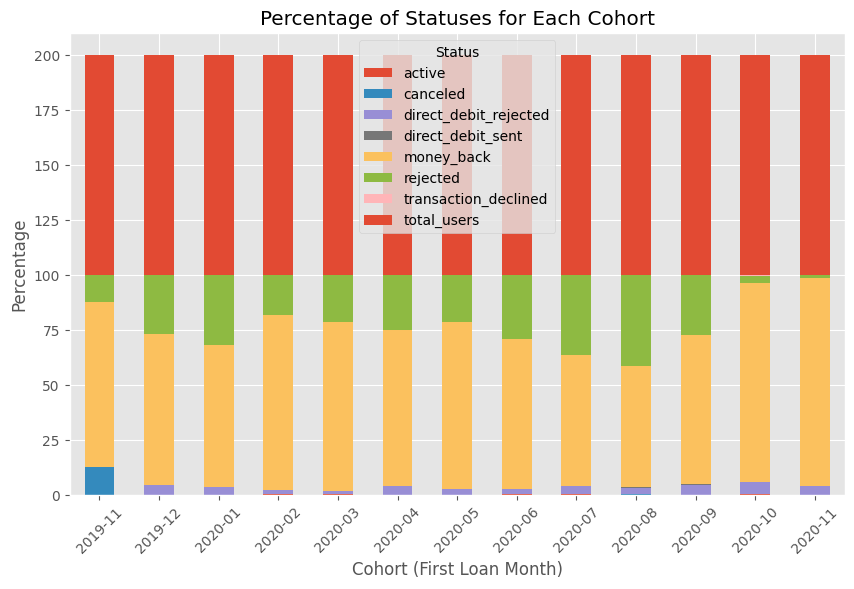

In [19]:
# Calculate total users for each cohort
cohort_status_counts_pivot['total_users'] = cohort_status_counts_pivot.sum(axis=1)

# Calculate percentage of each status for each cohort
cohort_status_counts_pivot_percentage = cohort_status_counts_pivot.div(cohort_status_counts_pivot['total_users'], axis=0) * 100

# Visualize the data
cohort_status_counts_pivot_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage of Statuses for Each Cohort')
plt.xlabel('Cohort (First Loan Month)')
plt.ylabel('Percentage')
plt.legend(title='Status')
plt.xticks(rotation=45)
plt.show()

In [20]:
cash.head(5)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,month,cohorts
538,1302,100.0,rejected,2020-04-20 15:50:21.187257+00:00,2020-04-22 12:03:34.439811+00,34.0,2020-04-22 12:03:34.434712+00,NaN,2020-04-27 15:50:21.18689+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-04,2020-04
91,758,90.0,rejected,2020-02-28 10:51:11.440880+00:00,2020-02-28 14:13:21.50435+00,35.0,2020-02-28 14:13:21.501335+00,NaN,2020-03-07 23:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-02,2019-12
345,510,90.0,rejected,2020-01-27 19:50:46.387431+00:00,2020-01-28 14:52:30.164273+00,35.0,2020-01-28 14:52:30.160427+00,NaN,2020-02-03 19:50:46.387008+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-01,2019-12
5298,12794,100.0,rejected,2020-08-17 13:19:41.318905+00:00,2020-08-17 15:04:14.916382+00,35.0,2020-08-17 15:04:14.912309+00,NaN,2020-09-07 22:00:00+00,NaN,NaN,instant,2020-08-24 13:19:41.267425+00,NaN,NaN,NaN,2020-08,2019-12
58,150,100.0,rejected,2019-12-13 20:27:38.106778+00:00,2019-12-18 15:20:41.722482+00,35.0,2019-12-18 15:20:41.715612+00,NaN,2019-12-20 20:27:38.106319+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12,2019-12


# RFM (recency, frequency, monetary)
Ranking division of users by quantiles from 4 to 1 being 4 the highest value and 1 the lowest:

3. Monetary

In [21]:
# Calculation of income per user
income_user = cash[cash['status'] == 'money_back'].groupby(['user_id', 'cohorts'])['amount'].agg(total_income='sum').reset_index()
income_user

,user_id,cohorts,total_income
0,47.0,2019-11,131.0
1,52.0,2019-12,140.0
2,53.0,2019-12,400.0
3,66.0,2020-04,50.0
4,68.0,2019-12,30.0
...,...,...,...
8982,103425.0,2020-11,100.0
8983,103437.0,2020-11,100.0
8984,103496.0,2020-11,100.0
8985,103503.0,2020-11,50.0


In [22]:
# Divide the 'amount' column into 4 quantiles
income_user['monetary_ranking'] = pd.qcut(income_user['total_income'], q=4, labels=['1', '2', '3', '4'])
income_user

,user_id,cohorts,total_income,monetary_ranking
0,47.0,2019-11,131.0,3
1,52.0,2019-12,140.0,3
2,53.0,2019-12,400.0,4
3,66.0,2020-04,50.0,1
4,68.0,2019-12,30.0,1
...,...,...,...,...
8982,103425.0,2020-11,100.0,2
8983,103437.0,2020-11,100.0,2
8984,103496.0,2020-11,100.0,2
8985,103503.0,2020-11,50.0,1


In [23]:
# Count of users groupped by cohorts and monetary ranking
monetary_group = income_user.groupby(['cohorts', 'monetary_ranking'])['user_id'].agg(total=('count')).reset_index()
monetary_group.head()

C:\Users\ivani\AppData\Local\Temp\ipykernel_14004\24930883.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monetary_group = income_user.groupby(['cohorts', 'monetary_ranking'])['user_id'].agg(total=('count')).reset_index()


,cohorts,monetary_ranking,total
0,2019-11,1,0
1,2019-11,2,0
2,2019-11,3,1
3,2019-11,4,0
4,2019-12,1,8


In [24]:
# Total of users per cohort
cohort_totals = monetary_group.groupby('cohorts')['total'].sum()
cohort_totals.head()

cohorts
2019-11      1
2019-12    140
2020-01     53
2020-02     65
2020-03     59
Freq: M, Name: total, dtype: int64

In [25]:
# Merge the total to the monetary group table
monetary_group = monetary_group.merge(cohort_totals, on='cohorts', how='left')
monetary_group.head()

,cohorts,monetary_ranking,total_x,total_y
0,2019-11,1,0,1
1,2019-11,2,0,1
2,2019-11,3,1,1
3,2019-11,4,0,1
4,2019-12,1,8,140


In [30]:
# Calculate the percentage in a new column
monetary_group['percentage'] = monetary_group['total_x'] / monetary_group['total_y'] * 100
monetary_group.head(5)

,cohorts,monetary_ranking,total_x,total_y,percentage
0,2019-11,1,0,1,0.000000
1,2019-11,2,0,1,0.000000
2,2019-11,3,1,1,100.000000
3,2019-11,4,0,1,0.000000
4,2019-12,1,8,140,5.714286


<Axes: xlabel='monetary_ranking', ylabel='cohorts'>

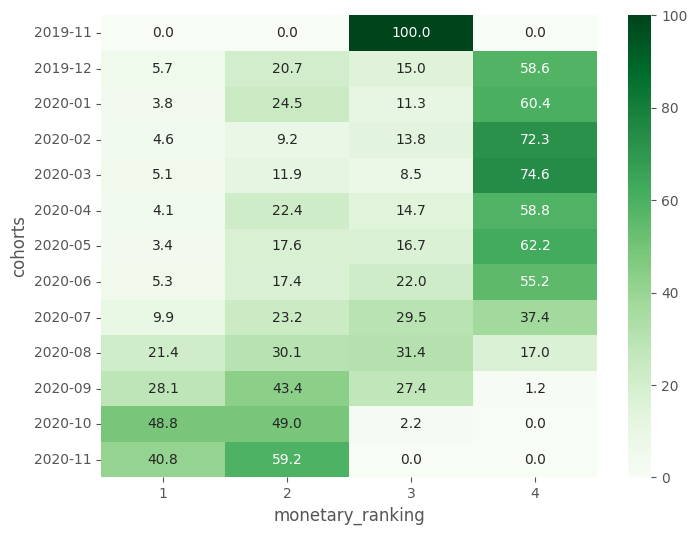

In [40]:
pivot_table = monetary_group.pivot(index='cohorts', columns='monetary_ranking', values='percentage')
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table,annot=True, fmt=".1f", cmap="Greens")